In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel("/content/drive/MyDrive/data/icecream.xlsx")

In [4]:
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [5]:
Reg1 = ols(formula="Sales ~ Student_Population", data=df1)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           2.55e-05
Time:                        09:47:20   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [6]:
print(anova_lm(Fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


<Axes: xlabel='Student_Population', ylabel='Sales'>

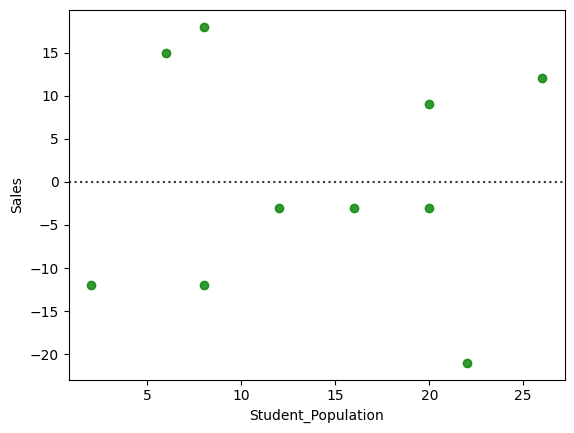

In [10]:
import seaborn as sns
sns.residplot(x = df1["Student_Population"], y = df1["Sales"], color="g")

In [11]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external

In [12]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

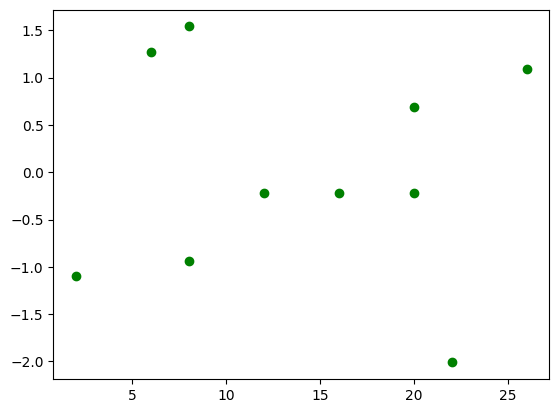

In [13]:
plt.figure()
plt.scatter(df1["Student_Population"], resid_student, color="green")

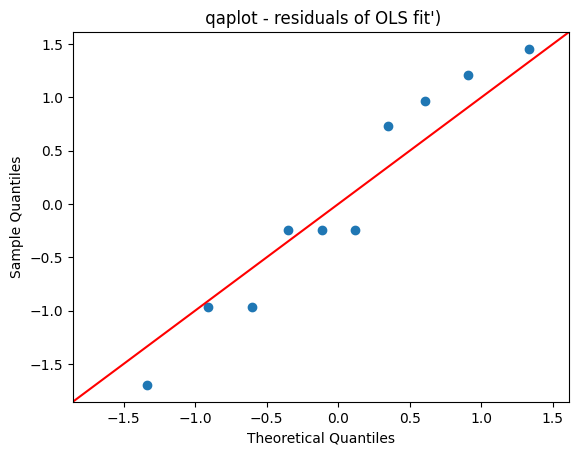

In [14]:
from scipy import stats
import statsmodels.api as sm
res = Fit1.resid # residuals
probplot = sm.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line="45")
h = plt.title(" qaplot - residuals of OLS fit')")
plt.show()